# House Prices Prediction - Advanced Regression Techniques

Names: 
IDs: 
Kaggle Profiles:

## Overview

In this notebook, we aim to predict house prices in Ames, Iowa, using the "House Prices - Advanced Regression Techniques" dataset provided by Kaggle. Our primary goal is to build a reliable and accurate predictive model utilizing Linear Regression techniques. To achieve this, we will:

Conduct comprehensive exploratory data analysis (EDA) to understand the dataset and its features.

Perform data preprocessing, including handling missing values, encoding categorical variables, and creating new meaningful features.

Implement and tune a Linear Regression model, testing various hyperparameters and regularization techniques to enhance performance.

Evaluate the model rigorously using validation techniques and error metrics such as Root Mean Squared Error (RMSE).

Submit predictions to Kaggle's competition to benchmark performance.

Throughout this notebook, visualizations and detailed explanations will be provided to clearly communicate our methodology, findings, and insights gained from the analysis. Our final goal is not only achieving a strong predictive performance but also ensuring clarity and reproducibility of the entire analytical process.

## Imports and Definitions


In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import pipeline, preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection

import pandas as pd
import seaborn as sns # we will use it for showing the regression line

# define plt settings (you don't have to do it every time, you can you the default values)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)


# Define my custom color palette
my_palette = [
 # Blues   
    (0.5, 0.7, 0.9),  # Pastel blue
    (0.6, 0.8, 0.9),  # Light pastel blue
    (0.4, 0.6, 0.8),  # Deep pastel blue
    (0.7, 0.85, 0.95),  # Sky pastel blue
    (0.3, 0.5, 0.7),   # Cool pastel blue
    (0.55, 0.75, 0.85),  # Cloudy pastel blue
    (0.45, 0.65, 0.85),  # Ocean pastel blue
    (0.38, 0.58, 0.78),  # Subtle pastel blue
    (0.48, 0.68, 0.88),  # Misty pastel blue
    (0.6, 0.78, 0.92),  # Calm pastel blue
    (0.5, 0.73, 0.85) , # Soft sky pastel blue


#Purples = 
    (0.8, 0.6, 0.9),  # Pastel purple
    (0.7, 0.5, 0.8),  # Light pastel purple
    (0.9, 0.7, 1.0),  # Soft lavender
    (0.85, 0.65, 0.95),  # Subtle pastel purple
    (0.75, 0.55, 0.85),  # Dreamy pastel purple
    (0.92, 0.72, 0.98),  # Lilac pastel purple
    (0.78, 0.58, 0.88),  # Light orchid purple
    (0.82, 0.62, 0.92),  # Lavender blush pastel purple
    (0.88, 0.68, 0.96),  # Light violet pastel purple
    (0.83, 0.63, 0.9),  # Soft amethyst pastel purple
    (0.9, 0.75, 0.97),   # Blooming pastel purple

#Pinks
    (224/255, 31/255, 137/255),  # Vibrant pink
    (231/255, 72/255, 161/255),  # Medium pink
    (243/255, 165/255, 208/255),  # Light pink
    (1.0, 0.8, 0.9),  # Cotton candy pink
    (0.95, 0.7, 0.85),  # Blush pink
    (0.98, 0.75, 0.88),  # Rose quartz pastel pink
    (0.96, 0.68, 0.8),  # Soft coral pastel pink
    (0.94, 0.6, 0.75),  # Pastel bubblegum pink
    (0.97, 0.77, 0.87),  # Sakura pastel pink
    (0.92, 0.65, 0.8),  # Light raspberry pastel pink
    (0.89, 0.58, 0.72)   # Dusky pastel pink
]


## Competition Description

This section provides a brief explanation of the competition. We describe the objective of the task, which is to predict final house sale prices using a variety of explanatory variables. Understanding the competition's goal, evaluation metric (RMSE), and data format will help guide our data preparation and modeling strategy.


In [37]:
#Competition link
competition_url = "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques"
print(f"Kaggle Competition: {competition_url}")


Kaggle Competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


## Data Exploration (EDA)

Here, we perform an in-depth exploratory data analysis to uncover patterns, spot anomalies, and understand the structure of the data. This section helps us decide how to clean and transform the data later.

### Steps:

* Load and inspect the data: Understand the size and types of variables.
* Check for missing values: Identify which features have missing data that will need to be handled later.
* Understand the target variable: Look at the distribution of SalePrice.
* Explore correlations: Understand which variables are most strongly related to the target.
* Visualize features: Use plots to spot trends, outliers, and relationships.

#### Load the data

In [38]:
# Load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Display the first few rows of the training data
display(train.head())
# Display the first few rows of the test data
display(test.head())

# Display the shape of the training data
print(f"Shape of training data: {train.shape}")
# Display the shape of the test data
print(f"Shape of test data: {test.shape}")

# Display the data types of the training data
print(f"Data types in training data:\n{train.dtypes.to_dict()}")
# Display the data types of the test data
print(f"Data types in test data:\n{test.dtypes.to_dict()}")



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Shape of training data: (1460, 81)
Shape of test data: (1459, 80)
Data types in training data:
{'Id': dtype('int64'), 'MSSubClass': dtype('int64'), 'MSZoning': dtype('O'), 'LotFrontage': dtype('float64'), 'LotArea': dtype('int64'), 'Street': dtype('O'), 'Alley': dtype('O'), 'LotShape': dtype('O'), 'LandContour': dtype('O'), 'Utilities': dtype('O'), 'LotConfig': dtype('O'), 'LandSlope': dtype('O'), 'Neighborhood': dtype('O'), 'Condition1': dtype('O'), 'Condition2': dtype('O'), 'BldgType': dtype('O'), 'HouseStyle': dtype('O'), 'OverallQual': dtype('int64'), 'OverallCond': dtype('int64'), 'YearBuilt': dtype('int64'), 'YearRemodAdd': dtype('int64'), 'RoofStyle': dtype('O'), 'RoofMatl': dtype('O'), 'Exterior1st': dtype('O'), 'Exterior2nd': dtype('O'), 'MasVnrType': dtype('O'), 'MasVnrArea': dtype('float64'), 'ExterQual': dtype('O'), 'ExterCond': dtype('O'), 'Foundation': dtype('O'), 'BsmtQual': dtype('O'), 'BsmtCond': dtype('O'), 'BsmtExposure': dtype('O'), 'BsmtFinType1': dtype('O'), 'Bsmt

### Display the dataset info, count, Nan, columns type, etc.

#### info

In [40]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### Show dataset statistics on each column

In [41]:
train.describe()
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Checking for missing values



Missing values in the Test set:

Missing: 227 -> nuinqe: 115 -> LotFrontage: [80. 81. 74. 78. 43. 75. nan], dtype: float64
Missing: 1352 -> nuinqe: 2 -> Alley: [nan 'Pave' 'Grvl'], dtype: object
Missing: 894 -> nuinqe: 3 -> MasVnrType: [nan 'BrkFace' 'Stone' 'BrkCmn'], dtype: object
Missing: 15 -> nuinqe: 303 -> MasVnrArea: [  0. 108.  20. 504. 492. 162. 256.], dtype: float64
Missing: 44 -> nuinqe: 4 -> BsmtQual: ['TA' 'Gd' 'Ex' 'Fa' nan], dtype: object
Missing: 45 -> nuinqe: 4 -> BsmtCond: ['TA' 'Po' 'Fa' 'Gd' nan], dtype: object
Missing: 44 -> nuinqe: 4 -> BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan], dtype: object
Missing: 42 -> nuinqe: 6 -> BsmtFinType1: ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan], dtype: object
Missing: 42 -> nuinqe: 6 -> BsmtFinType2: ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan], dtype: object
Missing: 730 -> nuinqe: 5 -> FireplaceQu: [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex'], dtype: object
Missing: 76 -> nuinqe: 6 -> GarageType: ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' '

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_92214/4044695199.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_missing, y='Feature', x='Missing Count', palette=my_palette)
/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_92214/4044695199.py:31: UserWarning: The palette list has more values (33) than needed (18), which may not be intended.
  sns.barplot(data=df_missing, y='Feature', x='Missing Count', palette=my_palette)


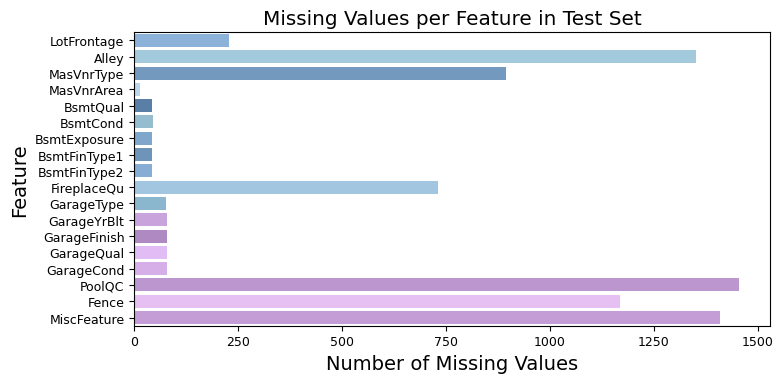

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_92214/4044695199.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_missing_train, y='Feature', x='Missing Count', palette=my_palette)
/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_92214/4044695199.py:42: UserWarning: The palette list has more values (33) than needed (17), which may not be intended.
  sns.barplot(data=df_missing_train, y='Feature', x='Missing Count', palette=my_palette)


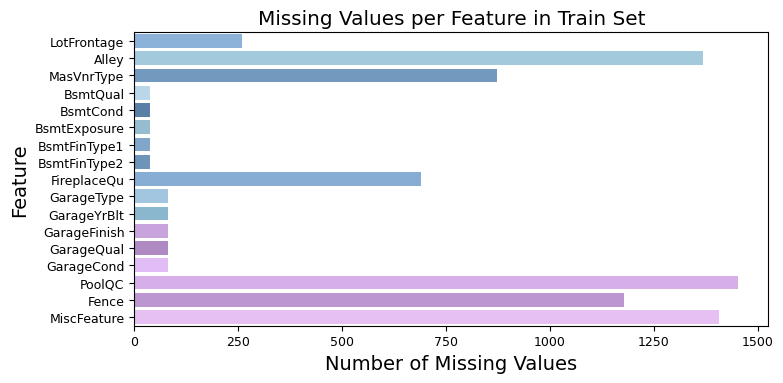

In [39]:
missing_test = {}
print("\nMissing values in the Test set:\n")
for key,value in test.isna().sum().to_dict().items(): # Check for missing values in the test set
    if value > 0:
        if value < 10:
            test[key].dropna(inplace=True) # Drop missing values if less than 10
        else:
            missing_test[key] = value
            print(f"Missing: {value} -> nuinqe: {test[key].nunique()} -> {key}: {test[key].unique()[0:7]}, dtype: {test[key].dtype}")

# Convert to DataFrame
df_missing = pd.DataFrame(list(missing_test.items()), columns=['Feature', 'Missing Count'])
print(df_missing)


missing_train = {}
print("\nMissing values in the Test set:\n")
for key,value in train.isna().sum().to_dict().items(): # Check for missing values in the test set
    if value > 0:
        if value < 10:
            train[key].dropna(inplace=True) # Drop missing values if less than 10
        else:
            missing_train[key] = value
            print(f"Missing: {value} -> nuinqe: {train[key].nunique()} -> {key}: {train[key].unique()[0:7]}, dtype: {train[key].dtype}")

df_missing_train = pd.DataFrame(list(missing_train.items()), columns=['Feature', 'Missing Count'])


#Plot of both train and test
plt.figure(figsize=(8, 4))
sns.barplot(data=df_missing, y='Feature', x='Missing Count', palette=my_palette)
plt.title('Missing Values per Feature in Test Set')
plt.xticks(size=9)
plt.yticks(size=9)
plt.xlabel('Number of Missing Values', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

# Plot of train only
plt.figure(figsize=(8, 4))
sns.barplot(data=df_missing_train, y='Feature', x='Missing Count', palette=my_palette)
plt.title('Missing Values per Feature in Train Set')
plt.xticks(size=9)
plt.yticks(size=9)
plt.xlabel('Number of Missing Values', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

### Distribution of SalePrice
We examine the shape of the target variable.
Many regression models assume normally distributed residuals (e.g., Linear Regression).
Since SalePrice is clearly right-skewed, we may later apply a log-transform to improve model fit.

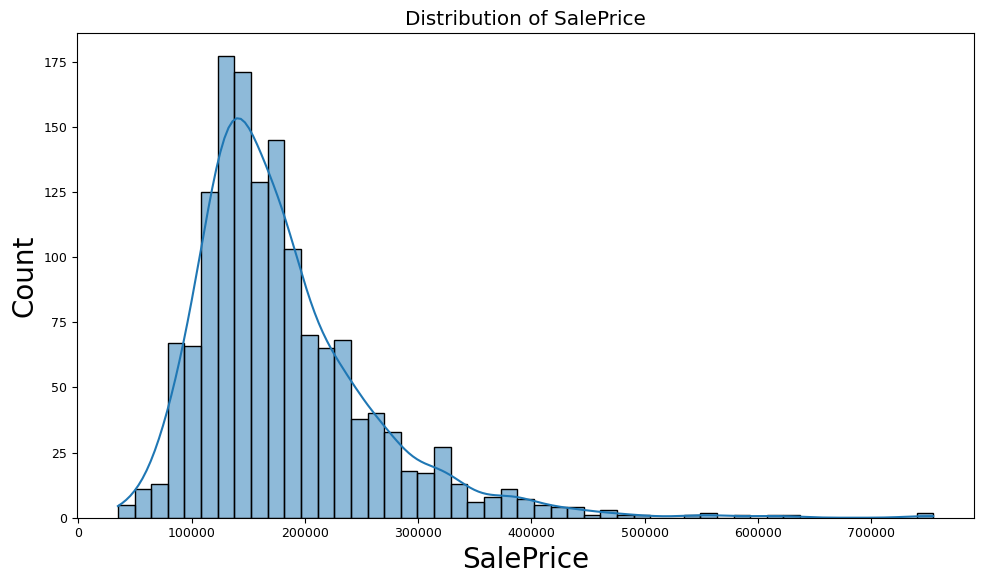

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.xticks(size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()

### Correlation with SalePrice
Pearson correlation identifies strong linear relationships between numeric features and the target.
Features with high absolute correlation are potential predictors.
Statistically, high multicollinearity between features or weak correlation with the target
can affect model performance.


Identify features strongly correlated with the target (like SalePrice)
Detect multicollinearity (when two or more features are highly correlated with each other)
Guide feature selection

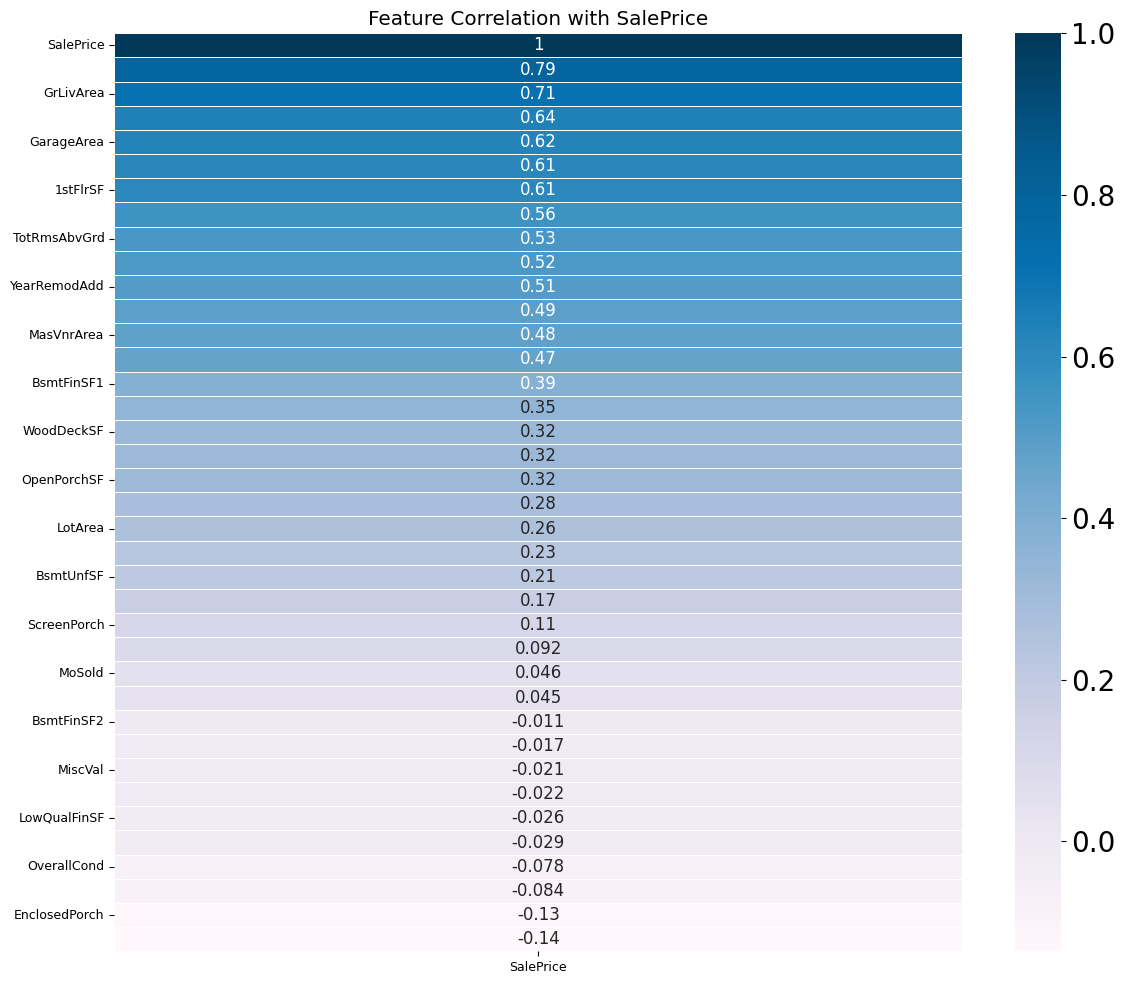

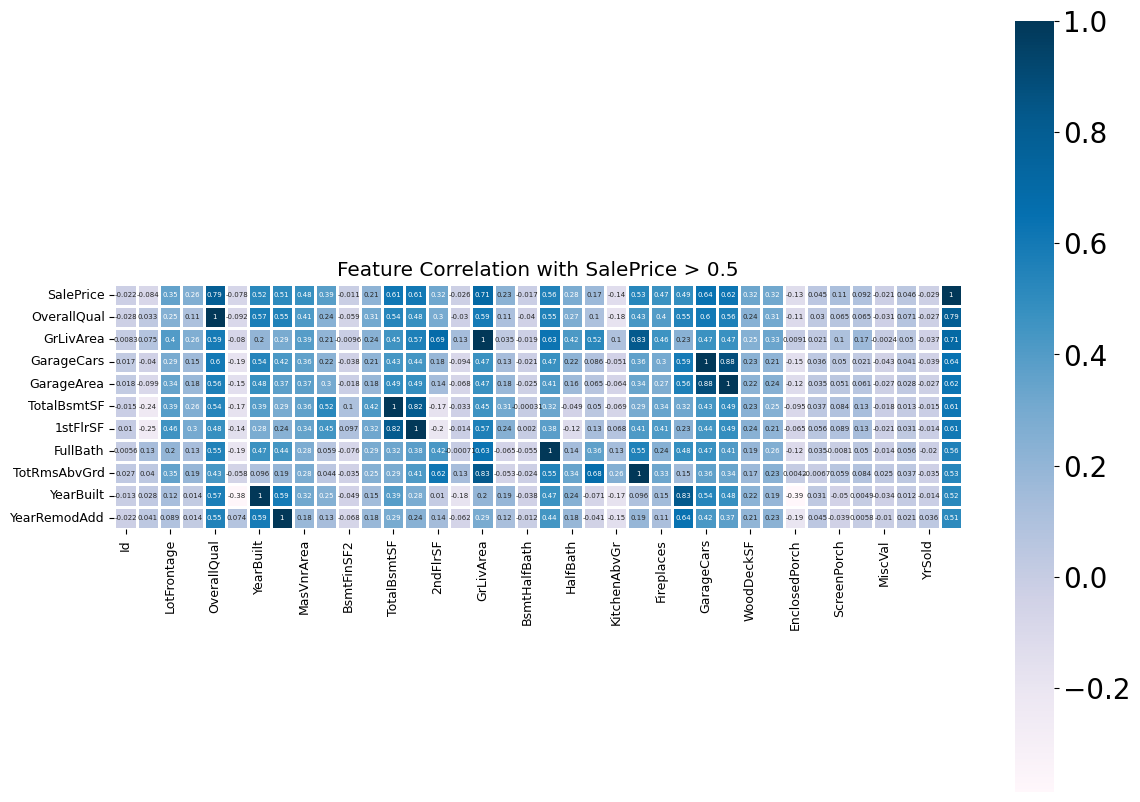

In [64]:
numeric = train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='PuBu', linewidths=0.5)
plt.title("Feature Correlation with SalePrice")
plt.xticks(size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()


# Plotting the correlation matrix couples of fitures with correlation > 0.5
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[correlation_matrix['SalePrice'] > 0.5].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='PuBu', square=True, linewidths=1, cbar_kws={"shrink": .8}, annot_kws={"size": 5})
plt.title("Feature Correlation with SalePrice > 0.5")
plt.xticks(size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()

In [44]:
# Matrix of correlation 

### Scatterplot: LotArea vs SalePrice
- Non-linear patterns that Pearson correlation wouldn't capture
- Outliers that could violate assumptions of homoscedasticity (constant variance)
- Linearity, which is required by Linear Regression

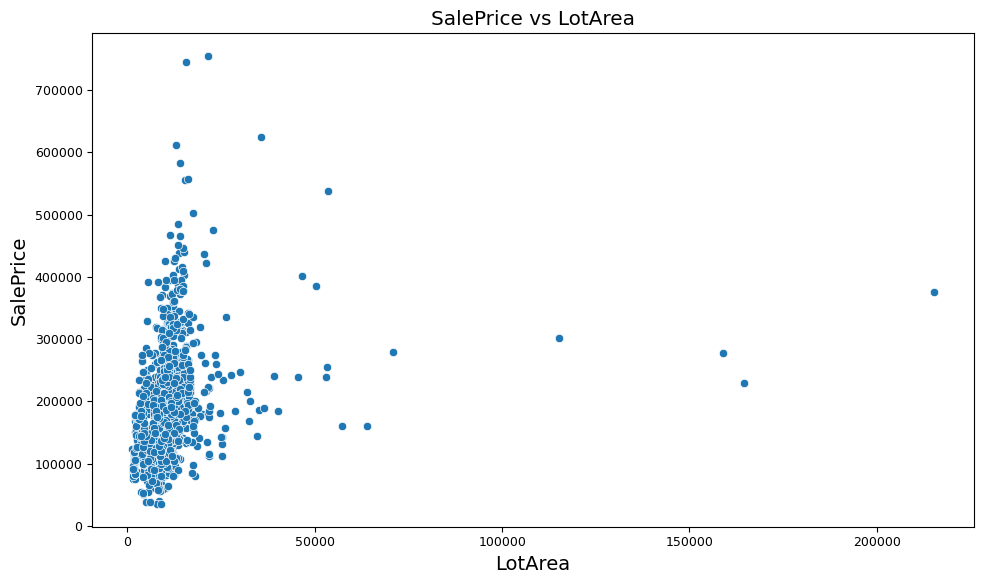

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='LotArea', y='SalePrice')
plt.title("SalePrice vs LotArea")
plt.xlabel("LotArea", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.xticks(size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()

### Handling Missing Values and Detailed Justification for it 

After exploratory analysis, we now impute missing values based on the meaning of each feature, guided by statistical principles and modeling requirements. Below is a breakdown of each imputation decision and its justification.

---

#### Categorical Features → Fill with `'None'`

**Features:**  

`Alley`, `MasVnrType`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`,  
`FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, `MiscFeature`

**Rationale:**  
- These are **nominal categorical variables**.
- In most of these features, missing values indicate that the house **does not include the feature** (e.g., no pool, no alley access, no basement).
- Statistically, it's inappropriate to leave them as `NaN` because:
  - Machine learning models can't handle `NaN` directly.
  - Imputing with mode would imply the feature exists and has a common category, which is misleading.
- Replacing with `'None'` maintains **semantic accuracy** and allows proper one-hot encoding later.

---

#### Numeric “Presence” Features → Fill with `0`

**Features:**  

`MasVnrArea`, `GarageYrBlt`

**Rationale:**  
- These are **quantitative continuous variables**, but in these cases, a missing value means the feature **does not exist** (no masonry veneer or no garage).
- Statistically:
  - Filling with the **mean or median** would imply the feature exists and has some average value, which would be incorrect.
  - `0` explicitly communicates the absence of the feature — maintaining **data integrity**.
- This is consistent with common practice in ML datasets: where **absence = 0**, not missing.

---

#### Continuous Variable with Spatial Dependency → Fill with **Median by Group**

**Feature:**  

`LotFrontage`

**Rationale:**  
- `LotFrontage` is a **continuous numerical variable** representing street frontage (in feet).
- Its missing values are likely **Missing At Random (MAR)** — and correlate with neighborhood design.
- Using the **grouped median by Neighborhood** preserves the **local structure of the data**, avoiding distortion from a global mean or median.
- Statistically:
  - Median imputation is robust to outliers.
  - Grouped median reduces bias and variance better than global median for spatial data.
  - This approach aligns with **conditional mean imputation** under the assumption of homogeneity within groups.

---

#### Final Checks:
After imputation, we verify that:
- All missing values are filled.
- No information is lost.
- The dataset is clean and suitable for encoding and modeling.


In [ ]:
# 1. Categorical features where NaN = absence → fill with 'None'
none_fill_cols = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]
for col in none_fill_cols:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

# 2. Numerical features where NaN = absence → fill with 0
zero_fill_cols = ['MasVnrArea', 'GarageYrBlt']
for col in zero_fill_cols:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

# 3. LotFrontage: spatial numeric → fill with median by neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# Final sanity check
print(\"Remaining missing values in train:\")
print(train.isnull().sum().sort_values(ascending=False).head())
print(\"\\nRemaining missing values in test:\")
print(test.isnull().sum().sort_values(ascending=False).head())


## Feature Engineering and Data Preprocessing

In this part, we clean and prepare the data for modeling. This includes handling missing values, encoding categorical variables, scaling numerical features if needed, and possibly creating new features that might help the model. Effective preprocessing is crucial for the success of any machine learning model.

* Normalization (e.g. z-score, divide in the length of the data)
* Feature extraction
* Decoding the data (e.g. change the values from strings to numbers, one-hot encoding)

## Model Implementation and Hyperparameter Tuning

We implement a Linear Regression model and experiment with different configurations to improve performance. We also explore regularization techniques such as Ridge and Lasso regression. This section includes cross-validation for selecting the best hyperparameters and avoiding overfitting.

## Model Evaluation
We evaluate our trained model using Root Mean Squared Error (RMSE) and analyze the prediction errors. We also present visual comparisons between predicted and actual values to assess how well the model generalizes. This helps us gain insights into the model’s strengths and weaknesses.

## Kaggle Submission

After training and validating our model, we use it to generate predictions for the test set. We then submit these predictions to the Kaggle competition and document the results, including screenshots of the submission and our rank on the leaderboard.

## Summary and Reflections

In this section, we summarize our workflow and key findings. We discuss what worked well and what could be improved. We reflect on our modeling choices and data handling, and how they influenced the results.

Notes:

Linear regression gave reasonable results, but Ridge regularization helped control overfitting.

Feature engineering and handling of missing values had a significant impact.

Visualization of errors provided useful insights into model performance.



## References - ADD LINKS

Kaggle Competition Page

Scikit-Learn Documentation

Pandas Documentation

Kaggle Notebooks by other participants

